In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [3]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

def load_data(filepath):
    df = pd.read_csv(filepath, sep=';')

    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'poutcome', 'y']

    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    features = ['age', 'balance', 'campaign', 'previous',
                'job', 'education', 'housing', 'loan', 'default']
    X = df[features]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df

X_scaled, data = load_data('/content/bank-full.csv')
print("Data shape:", X_scaled.shape)


Data shape: (45211, 9)


In [5]:
import numpy as np

class KMeansClustering:
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        np.random.seed(self.random_state)
        idx = np.random.choice(len(X), self.n_clusters, replace=False)
        return X[idx]

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, None] - self.centroids[None, :], axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids[k] = cluster_points.mean(axis=0)
            else:
                new_centroids[k] = self.centroids[k]
        return new_centroids

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

        self.labels = labels
        return self

    def predict(self, X):
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet.")
        return self._assign_clusters(X)


In [6]:
kmeans = KMeansClustering(n_clusters=3)
kmeans.fit(X_scaled)

print(kmeans.centroids)
print(kmeans.labels[:10])


[[-0.14184339 -0.14747247 -0.02042162 -0.01134722 -1.03316962 -0.72882131
   0.42104538  0.14331547  0.04199055]
 [ 0.26697511  0.14250205  0.03312423 -0.03480643  0.38546207  0.29869133
  -1.1171073  -0.13380582 -0.02206628]
 [-0.17126408 -0.01776646 -0.01835213  0.05295272  0.60288334  0.39350878
   0.89362935  0.01171237 -0.01690717]]
[2 2 0 2 1 2 2 2 0 2]


In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def apply_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    explained = pca.explained_variance_ratio_
    cumulative = np.cumsum(explained)

    plt.figure(figsize=(15, 4))

    # Explained variance
    plt.subplot(1, 3, 1)
    plt.bar(range(1, n_components + 1), explained)
    plt.title("Explained Variance Ratio")
    plt.xlabel("Principal Component")
    plt.ylabel("Variance Ratio")

    # Cumulative explained variance
    plt.subplot(1, 3, 2)
    plt.plot(range(1, n_components + 1), cumulative, marker='o')
    plt.title("Cumulative Explained Variance")
    plt.xlabel("Principal Component")
    plt.ylabel("Cumulative Variance")

    # 2D scatter of PCA components
    plt.subplot(1, 3, 3)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10)
    plt.title("PCA 2D Projection")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

    plt.tight_layout()
    plt.show()

    return X_pca


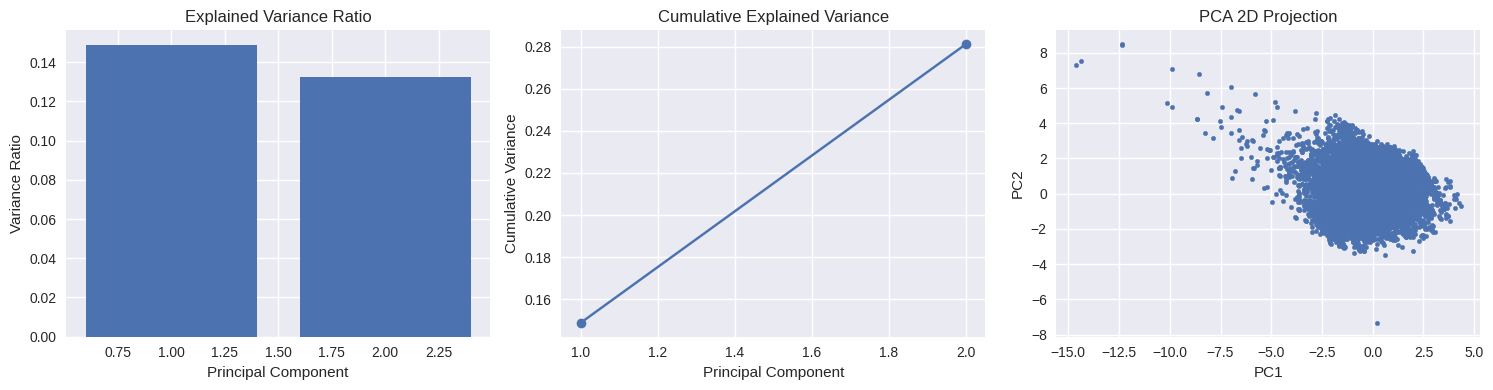

Shape after PCA: (45211, 2)


In [8]:
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)


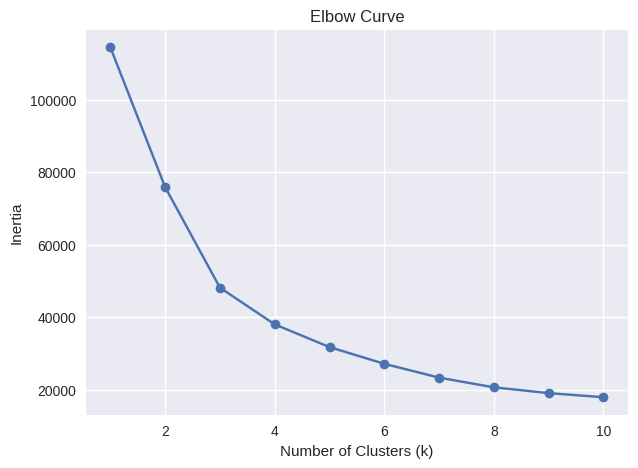

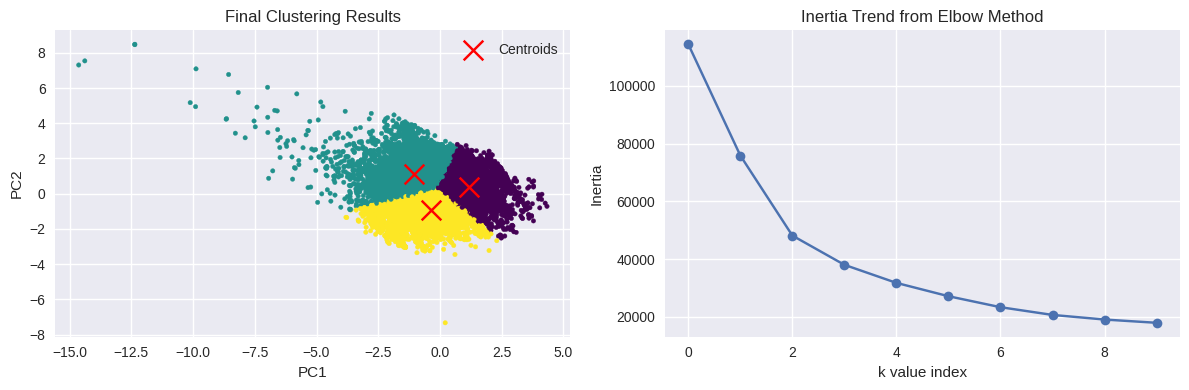


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

def calculate_inertia(X, labels, centroids):
    inertia = 0
    for k in range(len(centroids)):
        cluster_points = X[labels == k]
        distances = np.linalg.norm(cluster_points - centroids[k], axis=1)
        inertia += np.sum(distances ** 2)
    return inertia


def plot_elbow_curve(X, max_k=10):
    inertias = []
    K = range(1, max_k + 1)

    for k in K:
        model = KMeansClustering(n_clusters=k)
        model.fit(X)
        inertia = calculate_inertia(X, model.labels, model.centroids)
        inertias.append(inertia)

    plt.figure(figsize=(7, 5))
    plt.plot(K, inertias, marker='o')
    plt.title("Elbow Curve")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

    return inertias


# Compute elbow curve
inertias = plot_elbow_curve(X_pca)

# Choose k based on elbow (example: 3)
kmeans = KMeansClustering(n_clusters=3)
kmeans.fit(X_pca)

# Final clustering visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', s=10)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title("Final Clustering Results")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(inertias, marker='o')
plt.title("Inertia Trend from Elbow Method")
plt.xlabel("k value index")
plt.ylabel("Inertia")

plt.tight_layout()
plt.show()

# Evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")


In [10]:
import numpy as np
from sklearn.cluster import KMeans

class BisectingKMeans:
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        self.split_tree = {}
        self.centers_ = {}

    def fit_predict(self, X):
        n_samples = X.shape[0]

        labels = np.zeros(n_samples, dtype=int)
        current_num_clusters = 1
        next_label_id = 1

        while current_num_clusters < self.n_clusters:

            cluster_sizes = [(cluster_id, np.sum(labels == cluster_id))
                             for cluster_id in np.unique(labels)]
            cluster_to_split = max(cluster_sizes, key=lambda x: x[1])[0]

            mask = labels == cluster_to_split
            X_subset = X[mask]

            km = KMeans(n_clusters=2, random_state=self.random_state)
            split_labels = km.fit_predict(X_subset)

            left_child = cluster_to_split
            right_child = next_label_id

            labels[mask] = np.where(split_labels == 0, left_child, right_child)

            child_centroids = km.cluster_centers_
            self.split_tree[cluster_to_split] = (left_child, right_child)
            self.centers_[left_child] = child_centroids[0]
            self.centers_[right_child] = child_centroids[1]

            next_label_id += 1
            current_num_clusters += 1

        self.labels_ = labels
        return labels


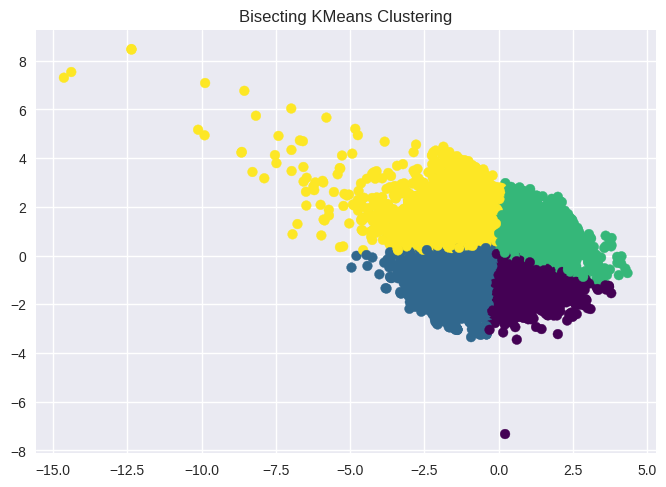

In [11]:
bisect = BisectingKMeans(n_clusters=4)
labels = bisect.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Bisecting KMeans Clustering")
plt.show()
